In [3]:
#事前準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
#データの読み込み
from sklearn.datasets import load_iris
df_iris=pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df_iris['target'] = load_iris().target
df_iris['kind'] = df_iris['target'].map({i: load_iris().target_names[i] for i in range(3)})

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,kind
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
#irisの分析
df_iris.shape

(150, 6)

In [6]:
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,kind
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [7]:
df_iris.describe().round()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.0,150.0,150.0,150.0,150.0
mean,6.0,3.0,4.0,1.0,1.0
std,1.0,0.0,2.0,1.0,1.0
min,4.0,2.0,1.0,0.0,0.0
25%,5.0,3.0,2.0,0.0,0.0
50%,6.0,3.0,4.0,1.0,1.0
75%,6.0,3.0,5.0,2.0,2.0
max,8.0,4.0,7.0,2.0,2.0


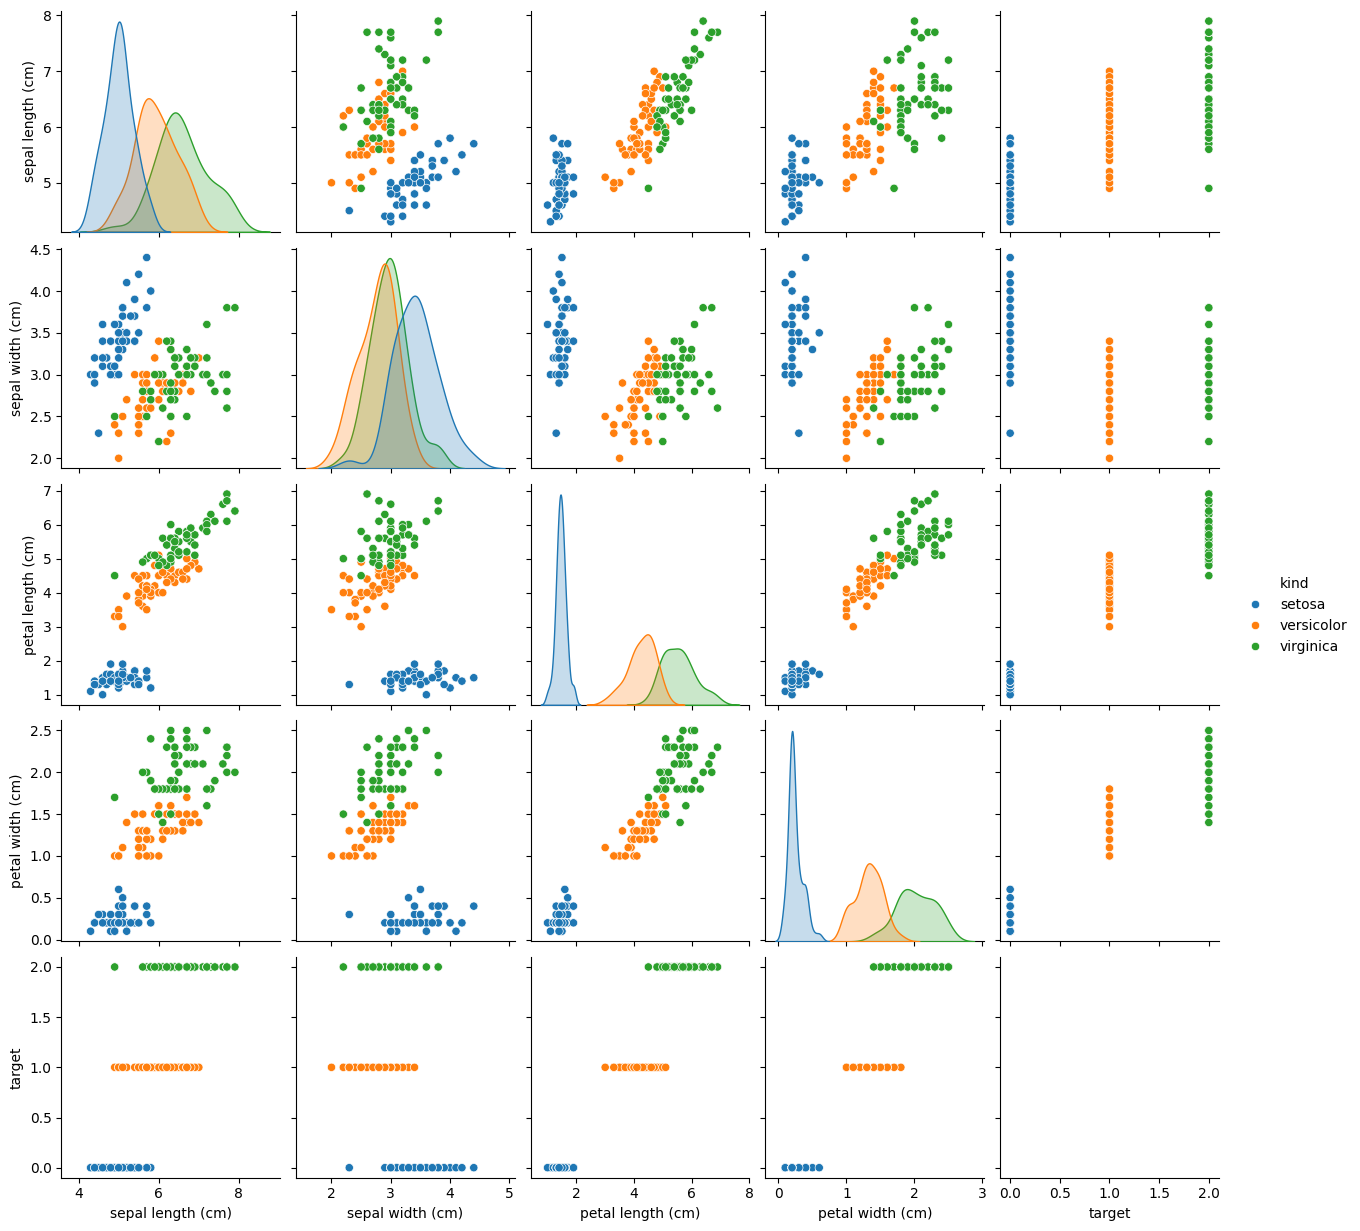

In [8]:
#クラスタリング
sns.pairplot(df_iris, hue="kind")

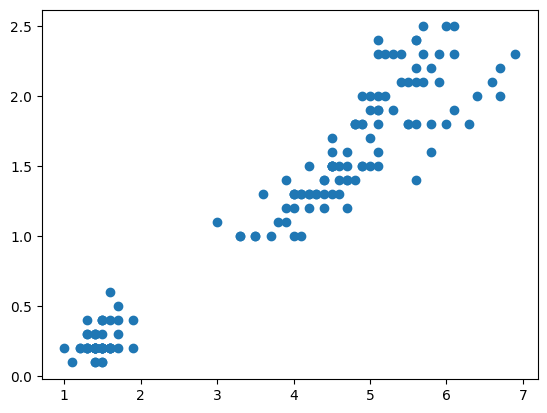

In [9]:
plt.scatter(df_iris["petal length (cm)"], df_iris["petal width (cm)"])

In [11]:
iris_petal_len_width = df_iris[["petal length (cm)","petal width (cm)"]].copy()
iris_petal_len_width

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [12]:
sc = StandardScaler()
sc.fit(iris_petal_len_width)
x_norm = sc.transform(iris_petal_len_width)

x = x_norm[:,0]
y = x_norm[:,1]

pd.DataFrame(x_norm).head()

,0,1
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


In [13]:
km = KMeans(n_clusters=3)
km.fit(x_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
cluster_center = pd.DataFrame(km.cluster_centers_)
display(cluster_center)

,0,1
0,-1.304987,-1.254893
1,1.028000,1.127978
2,0.305873,0.165418


<function matplotlib.pyplot.show(close=None, block=None)>

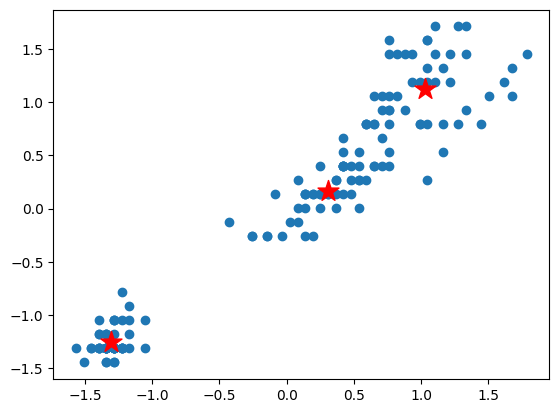

In [15]:
plt.scatter(x,y)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250,marker="*",c="red")
plt.show

In [16]:
iris_cluster = km.labels_
print(iris_cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


<function matplotlib.pyplot.show(close=None, block=None)>

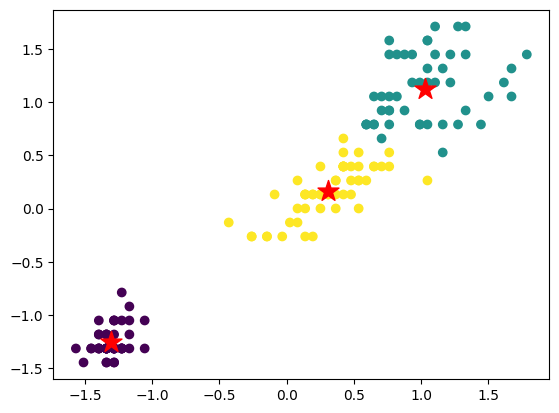

In [17]:
plt.scatter(x, y, c = km.labels_)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250,marker="*", c="red")
plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

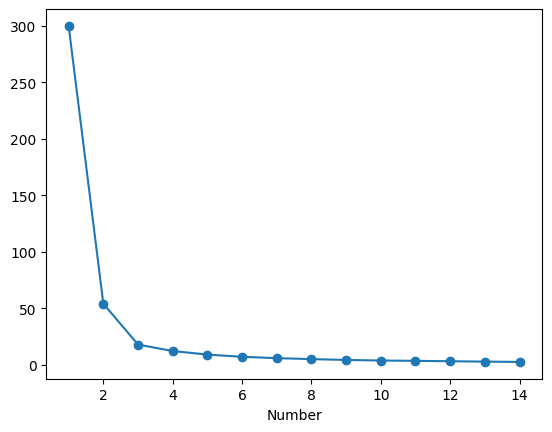

In [18]:
distortions=[]
for i in range(1, 15):
    km_elbow = KMeans(n_clusters=i, random_state=0)
    km_elbow.fit(x_norm)
    distortions.append(km_elbow.inertia_)

plt.plot(range(1,15), distortions ,marker="o")
plt.xlabel("Number")
plt.show()

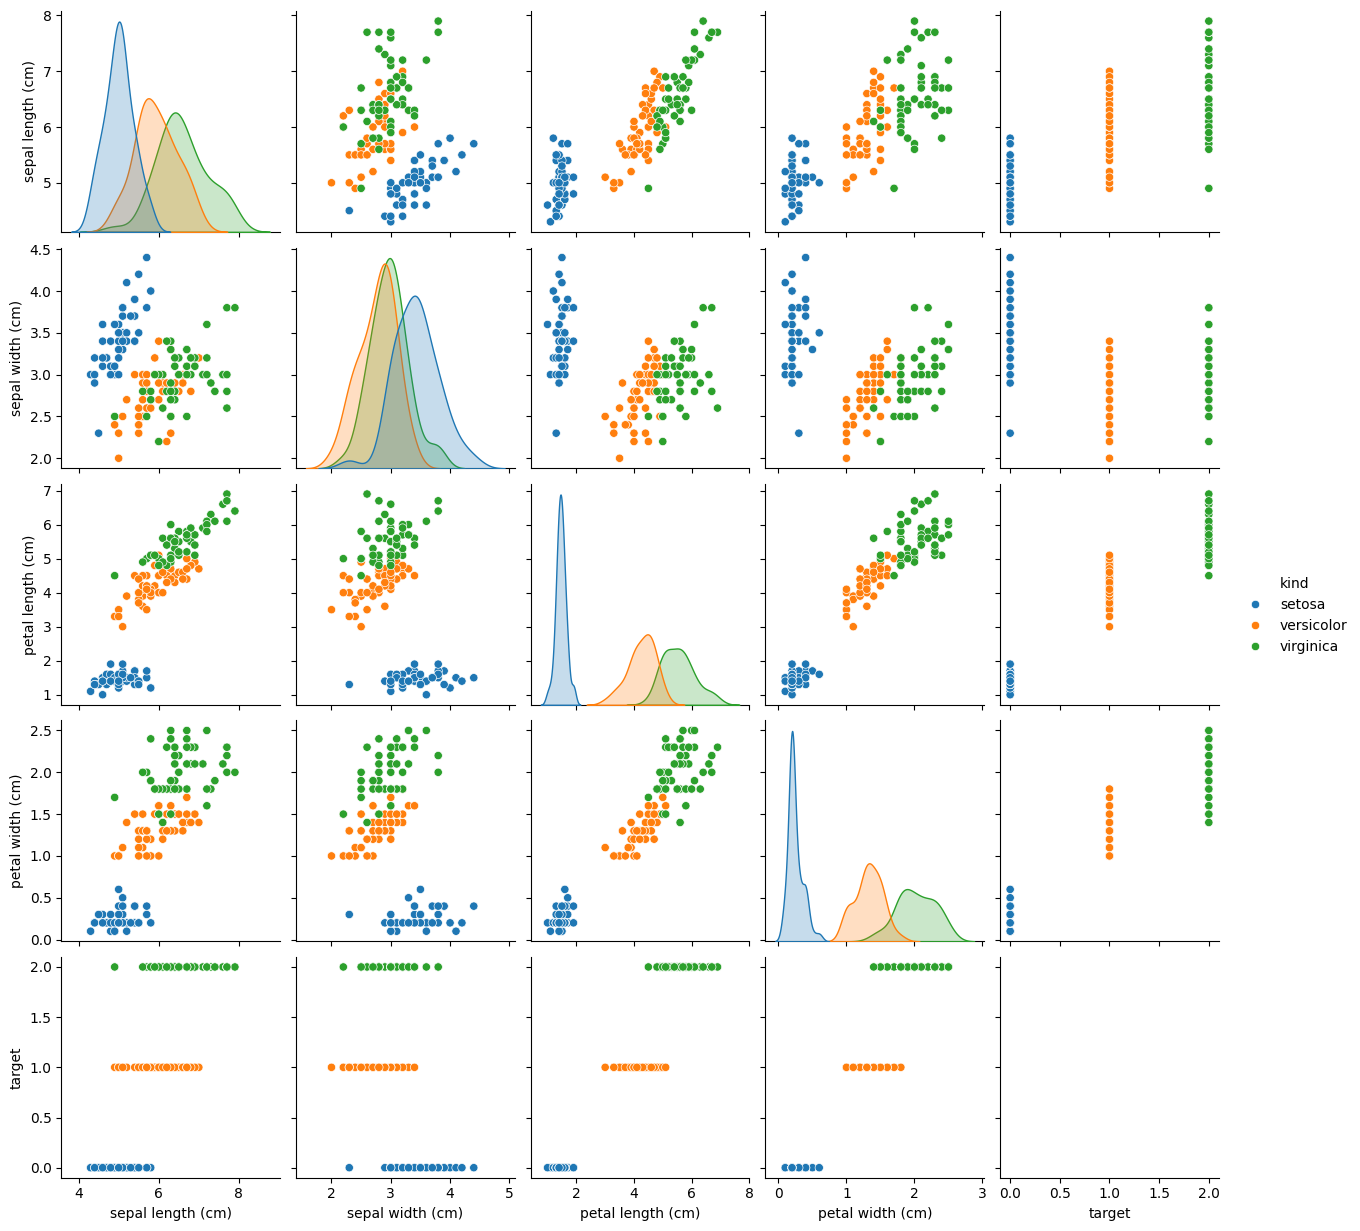

In [19]:
#次元削減
sns.pairplot(df_iris, hue="kind")

In [20]:
pca = PCA(random_state=0)
pca.fit(df_iris.iloc[:, 0:4])
X_pc = pca.transform(df_iris.iloc[:, 0:4])

df_pca = pd.DataFrame(X_pc, columns=["PC{}".format(i+1) for i in range(len(X_pc[0]))])
df_pca

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


In [21]:
display(df_pca.head())

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [22]:
print("PC Number:", pca.n_components_)

PC Number: 4


In [23]:
print("Keep Information:",round(np.sum(pca.explained_variance_ratio_), 2))

Keep Information: 1.0


<Axes: xlabel='PC1', ylabel='PC2'>

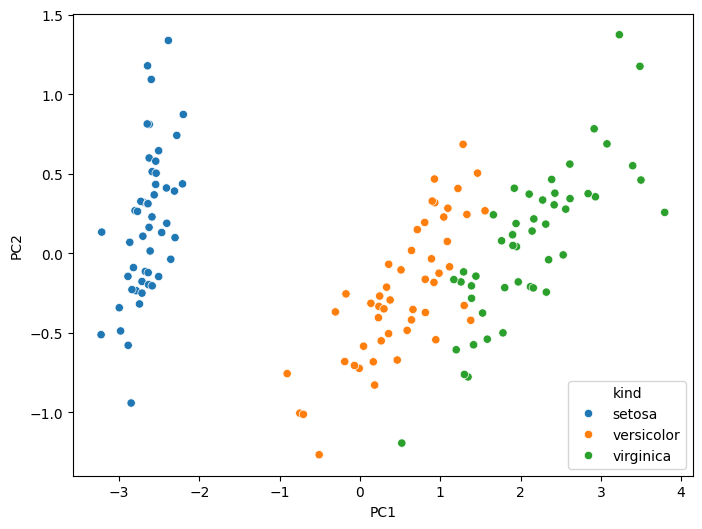

In [24]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

df_pca_kind = df_pca.copy()
df_pca_kind['kind'] = df_iris['kind']

sns.scatterplot(data=df_pca_kind, x='PC1', y='PC2', hue='kind')

In [25]:
pd.DataFrame(np.round(pca.explained_variance_, 2), index=["PCA{}".format(x+1) for x in range(len(df_pca.columns))], columns=["Eigenvalue"])

,Eigenvalue
PCA1,4.23
PCA2,0.24
PCA3,0.08
PCA4,0.02


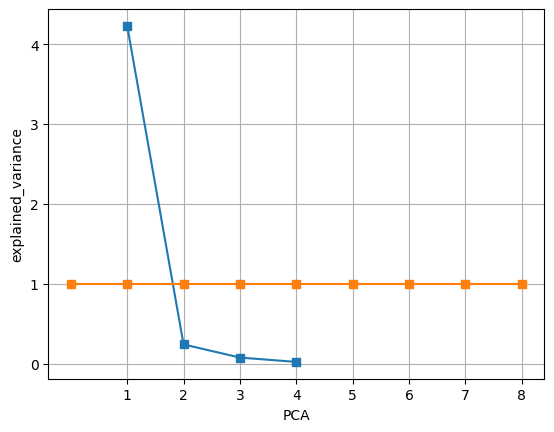

In [26]:
line=np.ones(9)
plt.plot(np.append(np.nan,pca.explained_variance_),"s-")
plt.plot(line,"s-")
plt.xlabel("PCA")
plt.ylabel("explained_variance")
plt.xticks(np.arange(1,9,1))
plt.grid()
plt.show()

In [27]:
pd.DataFrame(np.round(pca.explained_variance_ratio_, 2), index=["PCA{}".format(x+1) for x in range(len(df_pca.columns))], columns=["Contribution Rate"])

,Contribution Rate
PCA1,0.92
PCA2,0.05
PCA3,0.02
PCA4,0.01


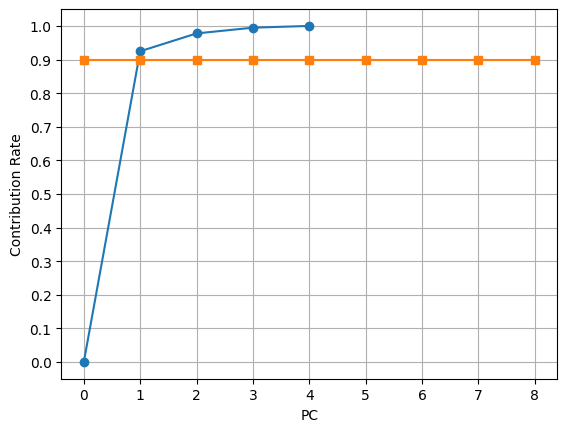

In [28]:
line=np.full(9,0.9)

plt.plot([0]+list(np.cumsum(pca.explained_variance_ratio_)),"-o")
plt.xlabel("PC")
plt.ylabel("Contribution Rate")
plt.yticks(np.arange(0,1.1,0.1))
plt.plot(line,"s-")
plt.grid()
plt.show()